# eda

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv('c:/users/gaurav yadav/downloads/crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df.info()
#as there is no null values so no need of imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
x=df.iloc[:,1:].values


In [34]:
#feature scaling
sc_x=StandardScaler()
x=sc_x.fit_transform(x)


In [35]:
#calculating wcss to select optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

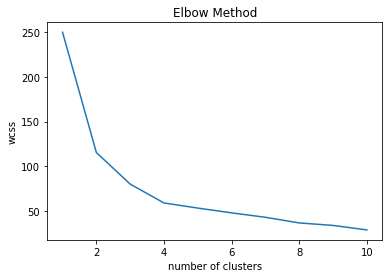

In [36]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [37]:
#from elbow chart it is clear we should go for  either 2 or 4 clusters.
kmeans=KMeans(n_clusters=4,random_state=1)
kmeans.fit(x)
df['cluster']=kmeans.labels_

In [21]:
df[df['cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [22]:
df[df['cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [23]:
df[df['cluster']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


In [24]:
df[df['cluster']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
24,Missouri,9.0,178,70,28.2,3
27,Nevada,12.2,252,81,46.0,3


In [26]:
df.groupby('cluster').agg('mean')


,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,3.600000,78.538462,52.076923,12.176923
3,10.815385,257.384615,76.000000,33.192308


# from clusters we can see there is not much distinction bw cluster 1 and cluster 3 bcz average murder in cluster 1 is maxm while average assault is maxm in cluster 3,same for rape . so lets go for 3 cluster

In [27]:
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(x)
df['cluster']=kmeans.labels_

In [28]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,12.165000,255.250,68.400000,29.16500
1,3.971429,86.500,51.928571,12.70000
2,5.656250,138.875,73.875000,18.78125


# conclusions
clusters  having states with minimum avg crime(murder,assault,rape) as well as minimum avg population.
cluster having states with maximum avg crime(murder,assault,rape) as well as maximum avg population.
reason for this type of result may be the population,more the population less will be the resources,or more will be the disparity bw individuals ,this may lead to high crime.